<a href="https://colab.research.google.com/github/hasmira0105/Public-repo/blob/main/4th_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation = ImageDataGenerator(rescale=1/255)


training_dataset = train.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Train',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

validation_dataset = validation.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Validation',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential ([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(5, 5),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')                
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                247872    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_dataset,
    steps_per_epoch = 8,
    epochs = 200,
    verbose = 1,
    validation_data = validation_dataset,
    validation_steps = 2
)

Epoch 1/200
8/8 [==============================] - 185s 20s/step - loss: 1.6124 - accuracy: 0.2225 - val_loss: 1.6136 - val_accuracy: 0.1900
Epoch 2/200
8/8 [==============================] - 131s 17s/step - loss: 1.6135 - accuracy: 0.2050 - val_loss: 1.6101 - val_accuracy: 0.2200
Epoch 3/200
8/8 [==============================] - 99s 13s/step - loss: 1.6117 - accuracy: 0.1925 - val_loss: 1.6051 - val_accuracy: 0.2700
Epoch 4/200
8/8 [==============================] - 73s 9s/step - loss: 1.6115 - accuracy: 0.2150 - val_loss: 1.6112 - val_accuracy: 0.2100
Epoch 5/200
8/8 [==============================] - 65s 8s/step - loss: 1.6122 - accuracy: 0.1900 - val_loss: 1.6081 - val_accuracy: 0.1800
Epoch 6/200
8/8 [==============================] - 44s 6s/step - loss: 1.6084 - accuracy: 0.2100 - val_loss: 1.6034 - val_accuracy: 0.2100
Epoch 7/200
8/8 [==============================] - 41s 5s/step - loss: 1.6126 - accuracy: 0.1600 - val_loss: 1.6019 - val_accuracy: 0.3100
Epoch 8/200
8/8 [=====

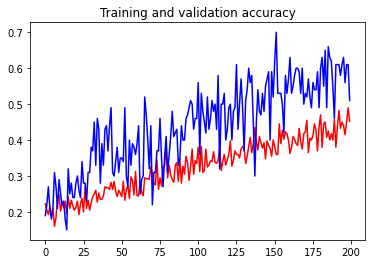

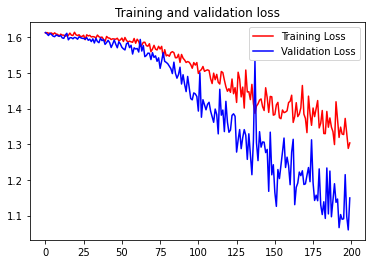

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Generate a Saved Model
import tensorflow as tf

tf.saved_model.save(model, '/content/drive/MyDrive/MY model/TFLite Model')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MY model/TFLite Model/assets


In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/MY model/TFLite Model')
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('tf.lite')
tflite_model_file.write_bytes(tflite_model)

296528

In [ ]:
# Download TFlite 

from google.colab import files
files.download(tflite_model_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>